# White Noise, Random Walk, Ad fuller Test

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("index2018.csv")

In [4]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


<AxesSubplot:>

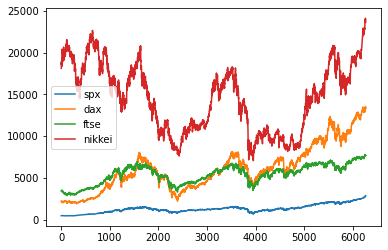

In [4]:
df.plot()

In [5]:
wn = np.random.normal(loc=df.spx.mean(),scale=df.spx.std(),size = len(df))

In [6]:
wn

array([1581.63534035, 1906.21340862, 1759.75844785, ...,  877.70552838,
       1291.04922379, 1325.20523574])

In [7]:
df['wn'] = wn

In [8]:
df.head()

,date,spx,dax,ftse,nikkei,wn
0,07/01/1994,469.90,2224.95,3445.98,18124.01,1581.635340
1,10/01/1994,475.27,2225.00,3440.58,18443.44,1906.213409
2,11/01/1994,474.13,2228.10,3413.77,18485.25,1759.758448
3,12/01/1994,474.17,2182.06,3372.02,18793.88,1407.792662
4,13/01/1994,472.47,2142.37,3360.01,18577.26,1828.635862


In [9]:
del df['dax']

In [10]:
df.head()

,date,spx,ftse,nikkei,wn
0,07/01/1994,469.90,3445.98,18124.01,1581.635340
1,10/01/1994,475.27,3440.58,18443.44,1906.213409
2,11/01/1994,474.13,3413.77,18485.25,1759.758448
3,12/01/1994,474.17,3372.02,18793.88,1407.792662
4,13/01/1994,472.47,3360.01,18577.26,1828.635862


In [11]:
del df['nikkei']

In [12]:
df.head()

,date,spx,ftse,wn
0,07/01/1994,469.90,3445.98,1581.635340
1,10/01/1994,475.27,3440.58,1906.213409
2,11/01/1994,474.13,3413.77,1759.758448
3,12/01/1994,474.17,3372.02,1407.792662
4,13/01/1994,472.47,3360.01,1828.635862


In [13]:
del df['ftse']

In [14]:
df.head()

,date,spx,wn
0,07/01/1994,469.90,1581.635340
1,10/01/1994,475.27,1906.213409
2,11/01/1994,474.13,1759.758448
3,12/01/1994,474.17,1407.792662
4,13/01/1994,472.47,1828.635862


In [15]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,spx,wn
0,1994-07-01,469.90,1581.635340
1,1994-10-01,475.27,1906.213409
2,1994-11-01,474.13,1759.758448
3,1994-12-01,474.17,1407.792662
4,1994-01-13,472.47,1828.635862


In [16]:
df.set_index('date',inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6269 entries, 1994-07-01 to 2018-01-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   spx     6269 non-null   float64
 1   wn      6269 non-null   float64
dtypes: float64(2)
memory usage: 146.9 KB


In [18]:
df.head()

,spx,wn
date,,
1994-07-01,469.90,1581.635340
1994-10-01,475.27,1906.213409
1994-11-01,474.13,1759.758448
1994-12-01,474.17,1407.792662
1994-01-13,472.47,1828.635862


In [19]:
df.describe()

,spx,wn
count,6269.000000,6269.000000
mean,1288.127542,1288.368126
std,487.586473,493.854722
min,438.920000,-428.561819
25%,990.671905,954.696047
50%,1233.420000,1291.743749
75%,1459.987747,1620.502977
max,2872.867839,3101.673830


# observation
see the mean differnce in whitenoise and std also

NameError: name 'plot' is not defined

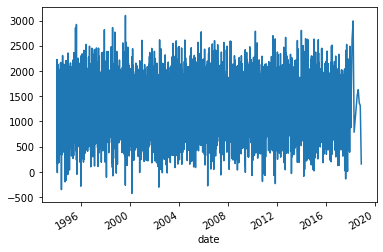

In [20]:
df.wn.plot()
plot.show()

AttributeError: 'DataFrame' object has no attribute 'title'

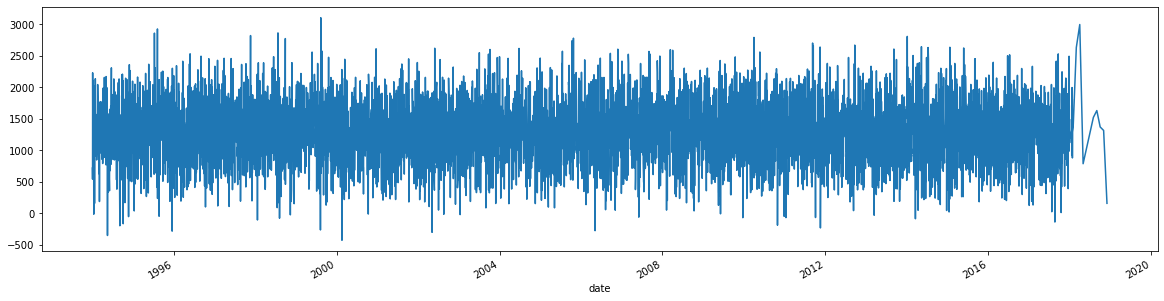

In [21]:
df.wn.plot(figsize=(20,5))
df.title('WhiteNoise Time series')
df.show()

AttributeError: 'DataFrame' object has no attribute 'title'

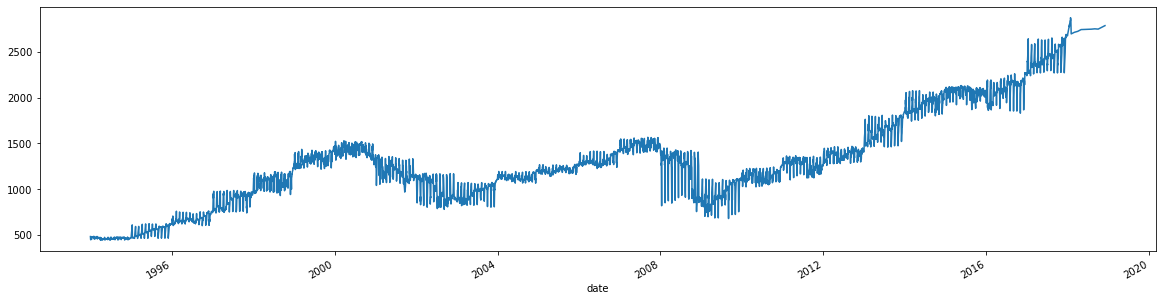

In [22]:
df.spx.plot(figsize=(20,5))
df.title('s&p500 Time series')
df.show()

AttributeError: 'DataFrame' object has no attribute 'title'

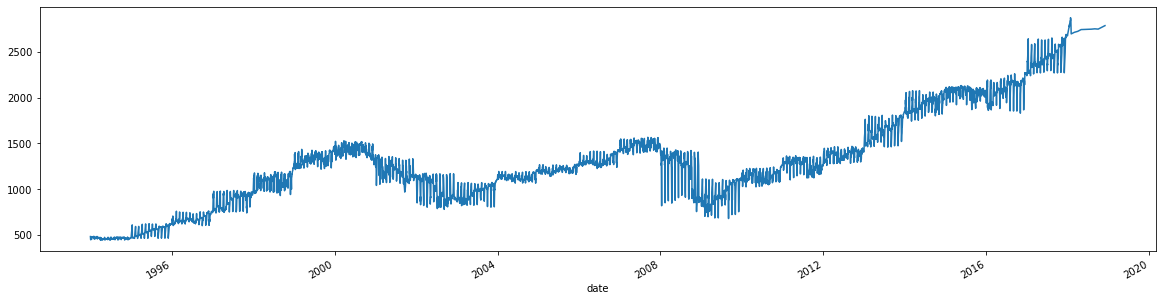

In [23]:
df.spx.plot(figsize=(20,5))
df.title('s&p500 Time series')
df.ylim(0,2500)
df.show()

# Stationarity

In [ ]:
H0:Time series is Non stationary
H1:Stationary 

In [24]:
import statsmodels.tsa.stattools as sts

In [25]:
#for adfuller test import stattools
sts.adfuller(df.spx)

(1.0724042027036536,
 0.9949740839827675,
 18,
 6250,
 {'1%': -3.4313967180469573,
  '5%': -2.862002556554404,
  '10%': -2.5670162159104},
 50197.90170692382)

In [26]:
sts.adfuller(df.wn)

(-45.926616554910595,
 0.0,
 2,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 95017.20991907097)

In [ ]:
#observation 1 - for s&p500 critical value is .99 so 90% chance of non rejecting null hypothesis,the series is non stationary
#observation 2 - for whitenoise there is no constant mean and variance, so critic value is 0

# Seasonality

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-38-e5bb82a6def0>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_additive = seasonal_decompose(df.spx, model= "additive",freq=18, extrapolate_trend = 20)


NameError: name 'plot' is not defined

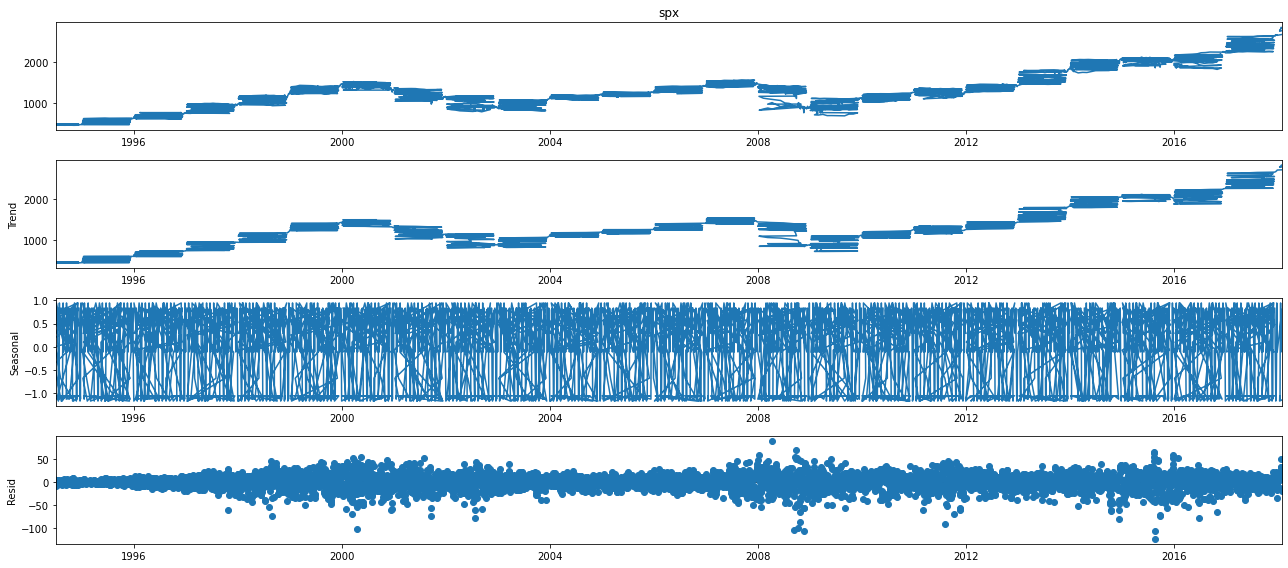

In [38]:
decompose_additive = seasonal_decompose(df.spx, model= "additive",freq=18, extrapolate_trend = 20)
decompose_additive.plot()
plot.show()

<ipython-input-42-288c131c9ce5>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_multiplicative = seasonal_decompose(df.spx, model= "multiplicative",freq=12, extrapolate_trend = 12)


NameError: name 'plot' is not defined

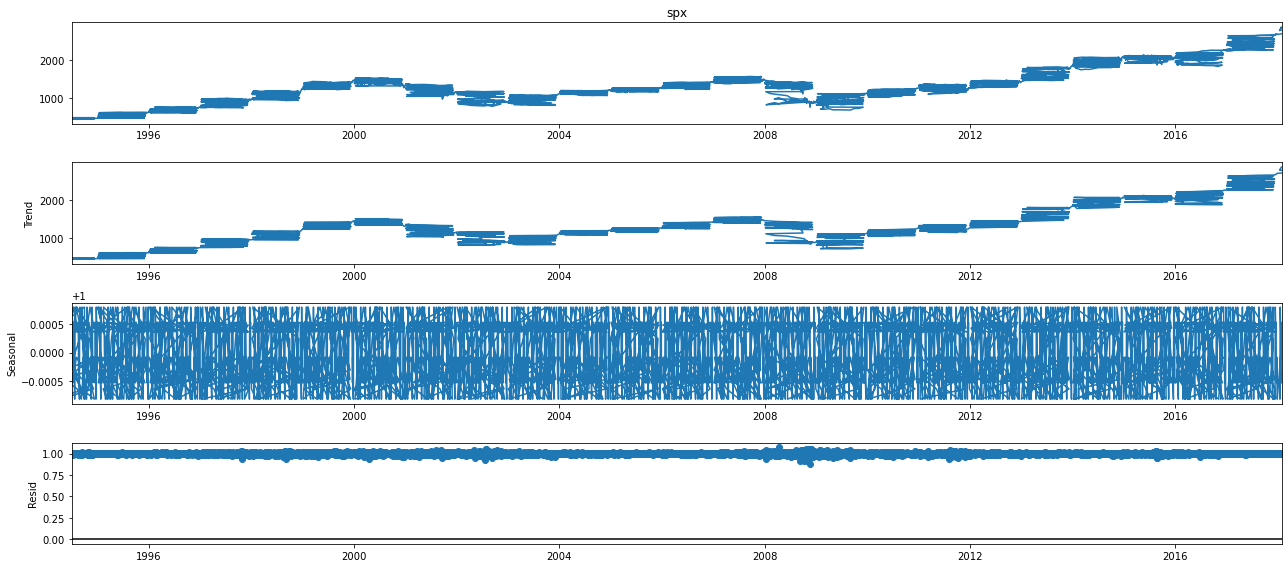

In [42]:
decompose_multiplicative = seasonal_decompose(df.spx, model= "multiplicative",freq=12, extrapolate_trend = 12)
decompose_multiplicative.plot()
plot.show()

In [31]:
df.spx

date
1994-07-01     469.900000
1994-10-01     475.270000
1994-11-01     474.130000
1994-12-01     474.170000
1994-01-13     472.470000
                 ...     
2018-01-23    2839.130362
2018-01-24    2837.544008
2018-01-25    2839.253031
2018-01-26    2872.867839
2018-01-29    2853.528411
Name: spx, Length: 6269, dtype: float64

In [32]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pylab import rcParams

<ipython-input-35-dd5e28b22072>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sm.tsa.seasonal_decompose(df.spx, model='additive',freq=12, extrapolate_trend = 12)


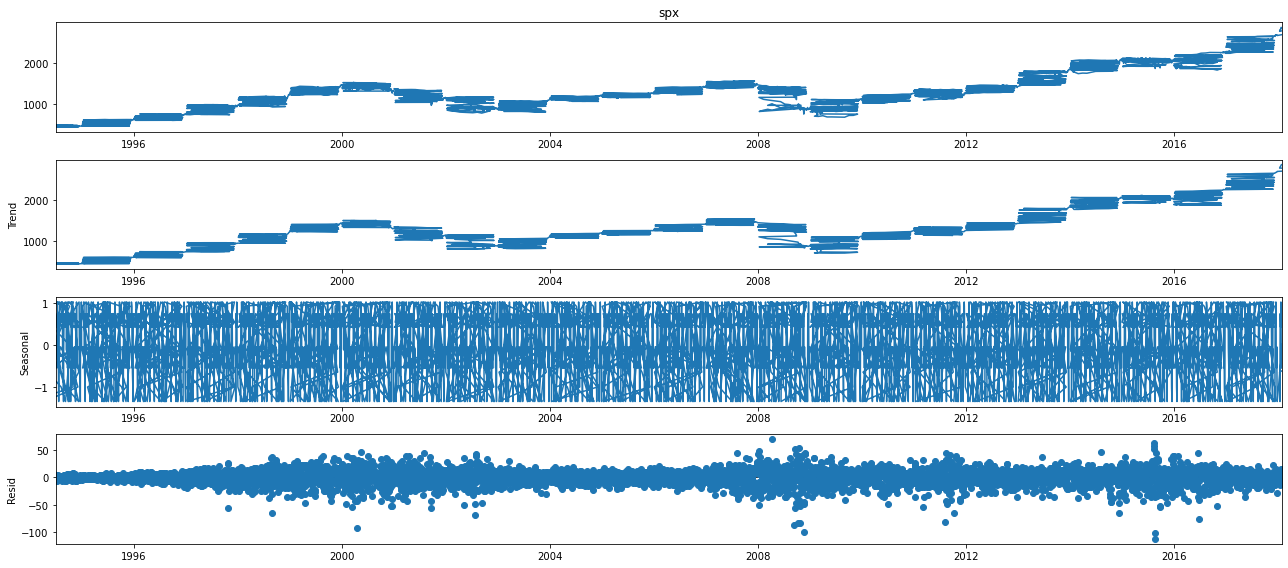

In [35]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df.spx, model='additive',freq=12, extrapolate_trend = 12)
fig = decomposition.plot()
plt.show()

In [ ]:
#observation
There is no seasonality in spx time series

# Auto correlation (ACF)

In [43]:
import statsmodels.graphics.tsaplots as sgt

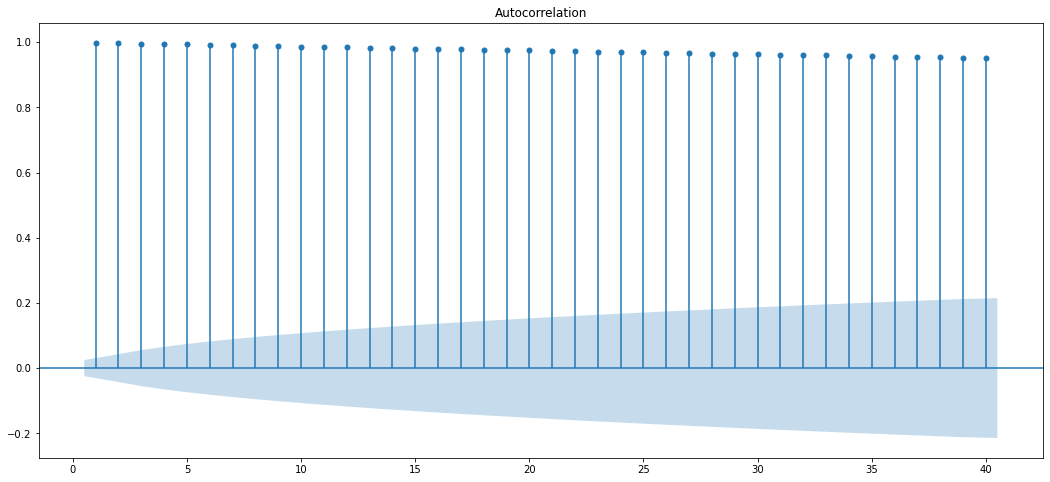

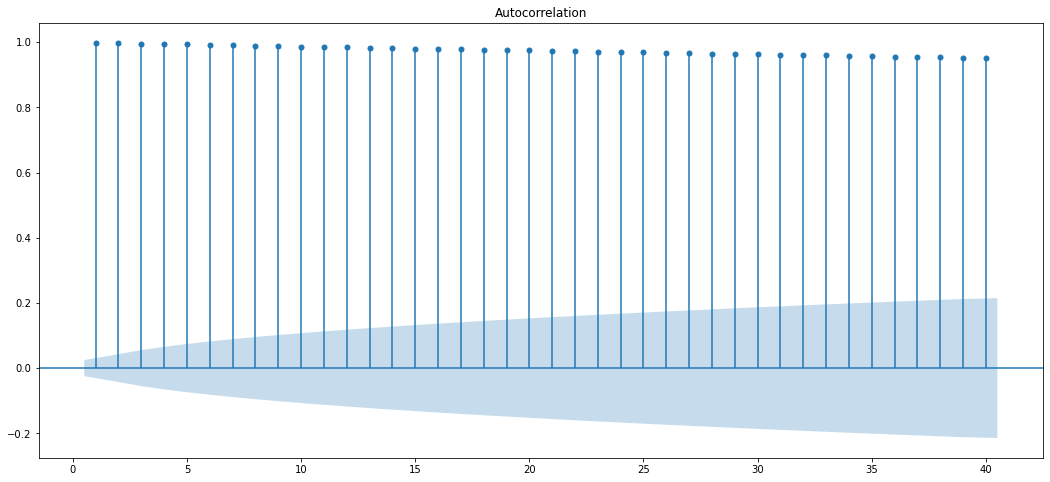

In [45]:
sgt.plot_acf(df.spx, lags = 40, zero = False)

In [ ]:
#ACF for WhiteNoise

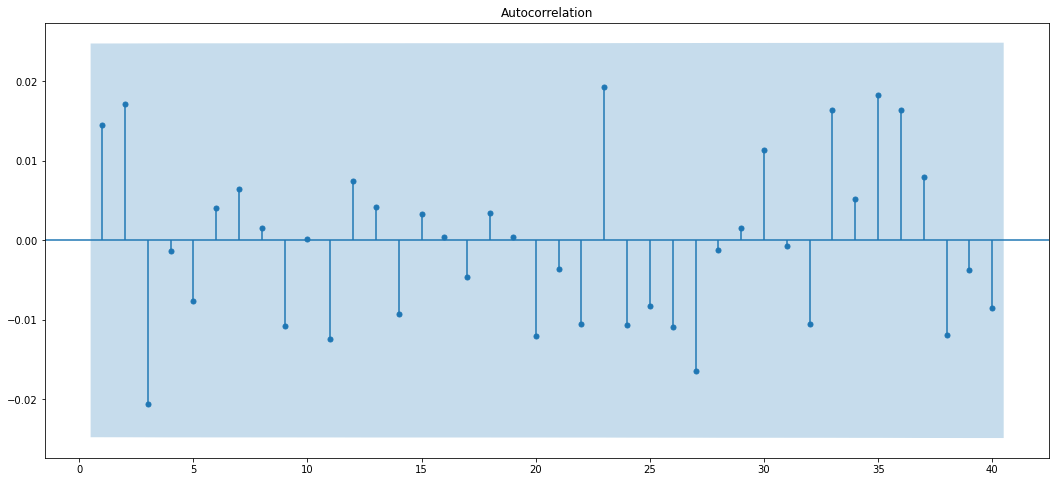

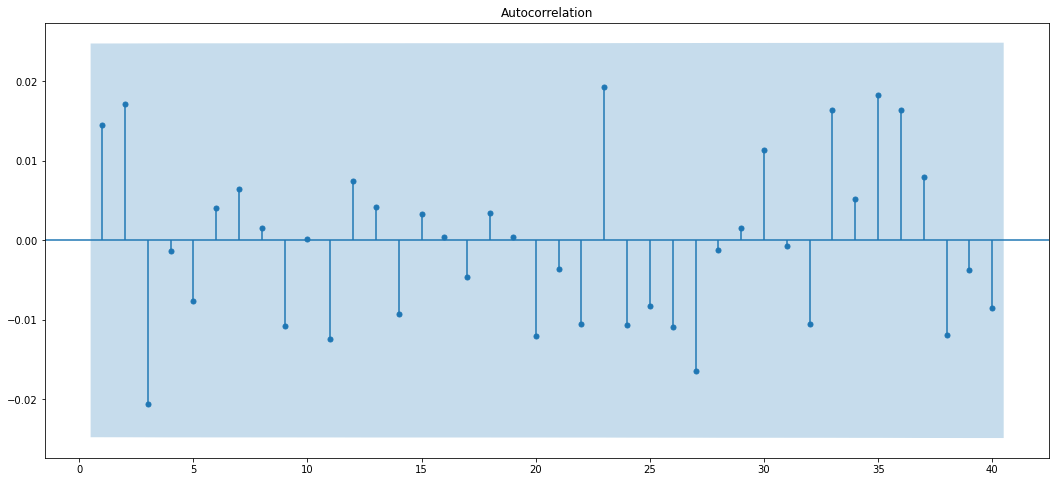

In [47]:
sgt.plot_acf(df.wn,lags=40,zero=False)

# pacf

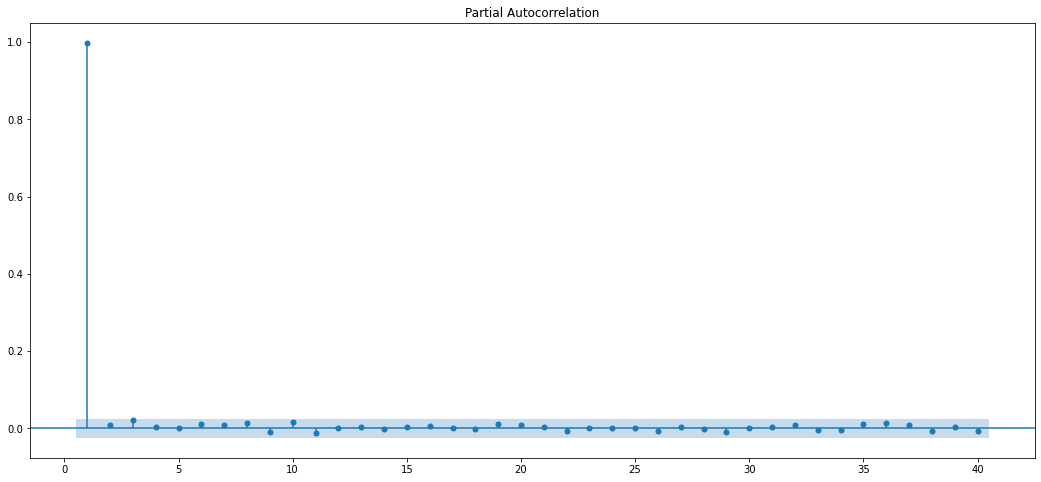

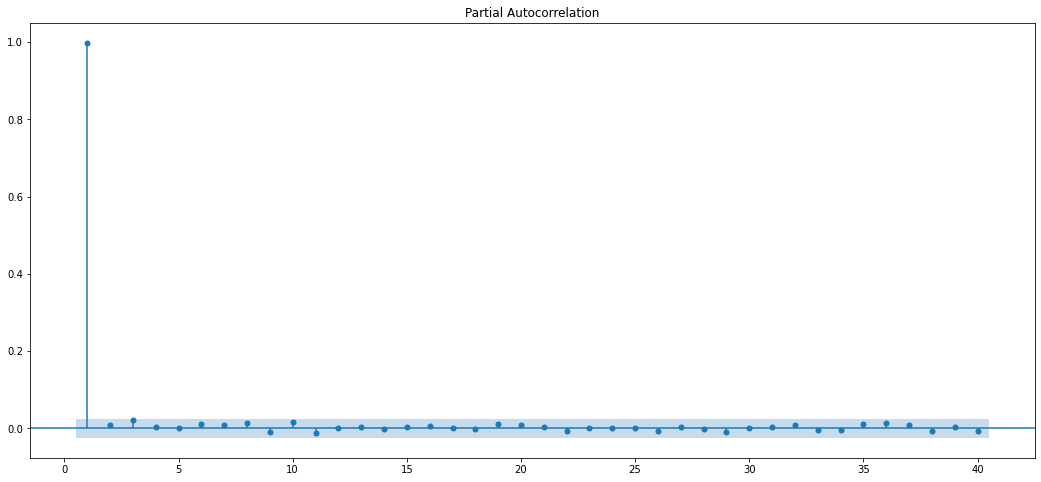

In [48]:
sgt.plot_pacf(df.spx,lags=40,zero=False)

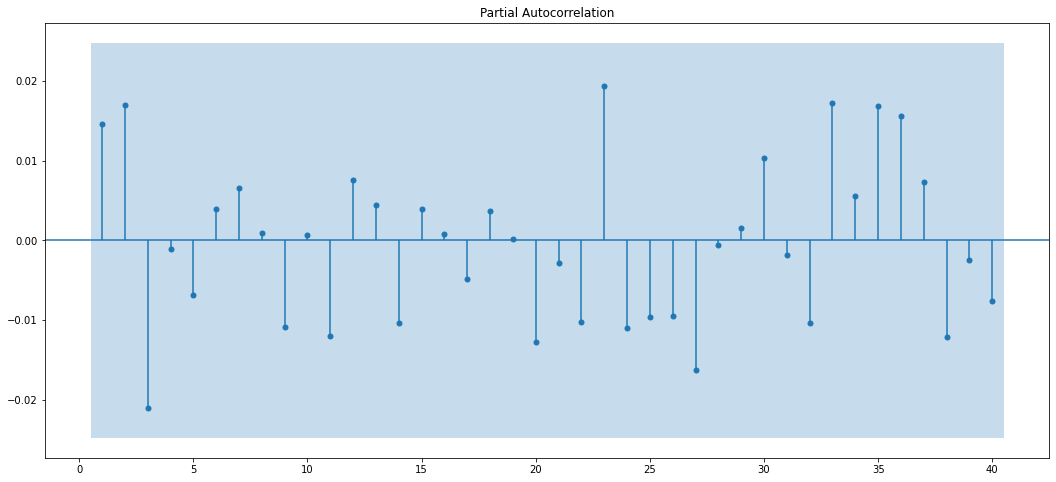

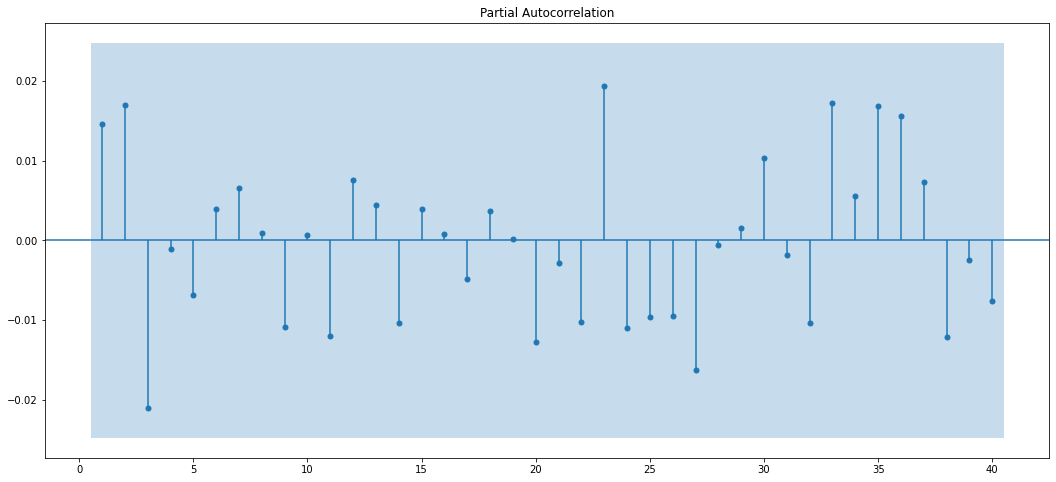

In [49]:
sgt.plot_pacf(df.wn,lags=40,zero=False)